<h2 align=center> Facial Expression Recognition</h2>

In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Task 1: Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import livelossplot 

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


Using TensorFlow backend.


### Task 2: Plot Sample Images

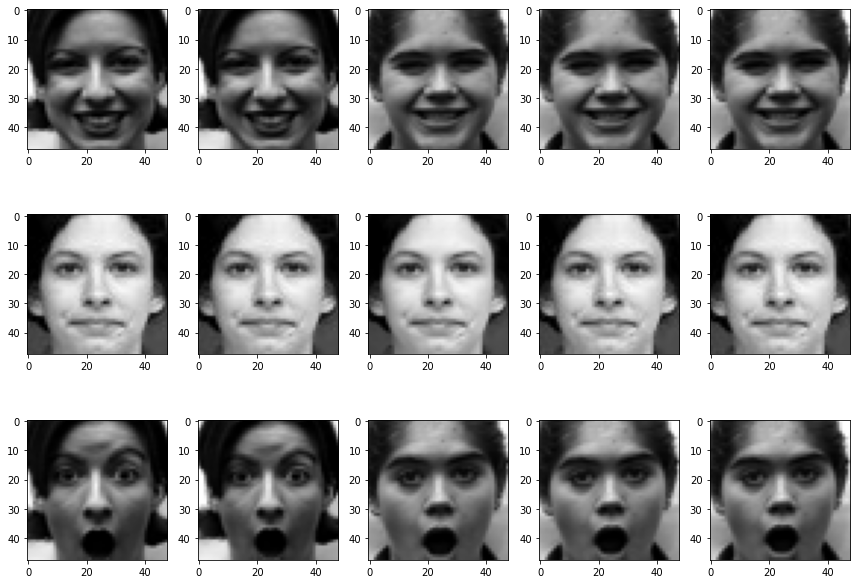

In [3]:
utils.datasets.fer.plot_example_images(plt).show()

In [4]:
for expression in os.listdir("traingender/"):
    print(str(len(os.listdir("traingender/" + expression))) + " " + expression + " images")

2203 female images
1978 male images


In [5]:
for expression in os.listdir("testgender/"):
    print(str(len(os.listdir("testgender/" + expression))) + " " + expression + " images")

540 female images
396 male images


### Task 3: Generate Training and Validation Batches

In [6]:
img_size = 70
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("C:/Users/lenovo/Documents/train_gender/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("C:/Users/lenovo/Documents/test_gender/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 5599 images belonging to 2 classes.
Found 1287 images belonging to 2 classes.


### Task 4: Create CNN Model

In [7]:

# Initialising the CNN
model = Sequential()


model.add(Conv2D(32, (3,3), padding="same", input_shape=(70, 70,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))




opt = Adam(lr=1e-3)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 64)        0

### Task 5: Visualize Model Architecture

### Task 6: Train and Evaluate Model

In [8]:
%%time

epochs =15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=1e-5, mode='auto')
#checkpoint = ModelCheckpoint("cnn.h5", monitor='val_accuracy',
   #              save_weights_only=True, mode='max', verbose=1)

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 87 steps, validate for 20 steps
Epoch 1/15
87/87 [==============================] - 7s 81ms/step - loss: 0.7705 - accuracy: 0.7322 - val_loss: 0.5152 - val_accuracy: 0.7781
Epoch 2/15
87/87 [==============================] - 3s 38ms/step - loss: 0.3770 - accuracy: 0.8569 - val_loss: 0.4381 - val_accuracy: 0.7953
Epoch 3/15
87/87 [==============================] - 3s 39ms/step - loss: 0.2645 - accuracy: 0.8947 - val_loss: 0.5476 - val_accuracy: 0.7891
Epoch 4/15
87/87 [==============================] - 5s 53ms/step - loss: 0.2358 - accuracy: 0.9098 - val_loss: 0.6205 - val_accuracy: 0.7617
Epoch 5/15
87/87 [==============================] - 5s 56ms/step - loss: 0.1880 - accuracy: 0.9292 - val_loss: 0.6133 - val_accuracy: 0.7883
Epoch 6/15
87/87 [==============================] - 5s 56ms/step - loss: 0.1555 - accuracy: 0.9431 - val_loss: 0.5108 - val_accuracy: 0.8328
Epoch 7/15
87/87 [==============================] - 5s 57ms/st

### Task 7: Represent Model as JSON String

In [11]:
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
    json_file.write(model_json)
print("Saved json to disk")    

Saved json to disk


In [12]:
model.save_weights("cnn.h5")
print("Saved model to disk")

Saved model to disk



## Delete duplicated images 

In [ ]:
# -*- coding: utf-8 -*-
"""duplicate_image_remove.ipynb
Automatically generated by Colaboratory.
Original file is located at
    https://colab.research.google.com/drive/17q-vNL4HQoKg7907A4SogxPYImqJlMD-
"""

# Commented out IPython magic to ensure Python compatibility.
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# %matplotlib inline
import time
import numpy as np

"""# Removing Duplicate Images Using Hashing"""

def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

import os

os.getcwd()

os.chdir(r'C:\Users\lenovo\Documents\DNA\DNA projects\Facial_Expression_Recognition\test\neutral')
os.getcwd()

file_list = os.listdir()
print(len(file_list))

import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

duplicates

for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

"""# Delete Files After Printing"""

for index in duplicates:
    os.remove(file_list[index[0]])

## resize photos in a folder 

In [8]:
#/usr/bin/python
from PIL import Image
import os, sys

path ="C:/Users/lenovo/Downloads/Mask/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((70,70), Image.ANTIALIAS)
            imResize.save(f + 'resized.png', 'PNG')
            print("done")

resize()

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


C:\Users\lenovo\anaconda3\envs\python3-6Env\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
